In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os

from falx.table_utils import *
from falx.chart.matplotlib_chart import *

#%reload_ext table_utils
%reload_ext autoreload

benchmark_dir = "../../benchmarks"

def values_to_colors(values):
    distinct_vals = list(set(values))
    cmap = matplotlib.cm.viridis
    colors = cmap(np.linspace(0, 1, len(distinct_vals)))
    return [colors[distinct_vals.index(x)] for x in values]

def load_input_table(fname):
    with open(os.path.join(benchmark_dir, fname), "r") as f:
        benchmark = json.load(f)
        input_data = benchmark["input_data"]
        df = pd.DataFrame.from_records(input_data)
        df = load_and_clean_table(df, return_as_df=True)
        return df

   index  Strongly Agree  Agree  Disagree  Strongly Disagree
0      0              50     35       8.0                  7
1      1              70     10      10.0                 10
2      2              45     30      15.0                 10


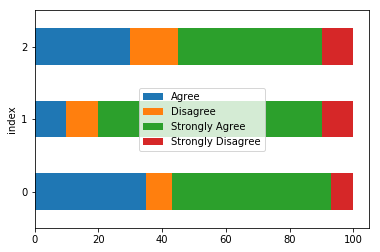

In [2]:
df = load_input_table("007.json")
df["index"] = df.index

#df.plot(kind="barh",x="index", y=["Agree", "Disagree", "Strongly Agree", "Strongly Disagree"], stacked=True)

chart = MatplotlibChart(df, 
            MpGroupBarChart("index", ["Agree", "Disagree", 
                                    "Strongly Agree", 
                                    "Strongly Disagree"], 
                          stacked=True, orient="horizontal"))

print(df)
#pprint(chart.eval())
chart.render()

      Class  Fall  Spring
0  Literacy    34      69
1  Language    63      77
2      Math    67      75
3   Science    92      98
4      Arts    96     100


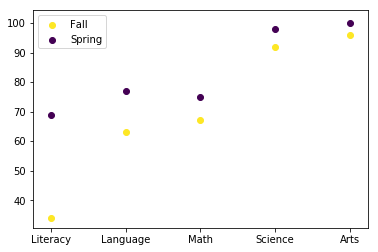

In [3]:
df = load_input_table("010.json")

# plt.scatter(y=df["Class"],x=df["Fall"], label="Fall")
# plt.scatter(y=df["Class"],x=df["Spring"], label="Spring")
# plt.legend()
# plt.show()

chart = MatplotlibChart(df, MpScatterPlot(c_x="Class", c_ys=["Fall", "Spring"]))

print(df)
#pprint(chart.eval())
chart.render()

    Net Cash Flow  Month  index  Net Cash Flow Sum       c      d
0           80000  Start      0              80000       0  False
1           -5003    Apr      1              74997   80000   True
2          -16700    May      2              58297   74997   True
3           48802    Jun      3             107099   58297  False
4          -11198    Jul      4              95901  107099   True
5          -35260    Aug      5              60641   95901   True
6           18220    Sep      6              78861   60641  False
7          -23840    Oct      7              55021   78861   True
8           43250    Nov      8              98271   55021  False
9          -18280    Dec      9              79991   98271   True
10          26670    Jan     10             106661   79991  False
11          15000    Feb     11             121661  106661  False
12          24750    Mar     12             146411  121661  False


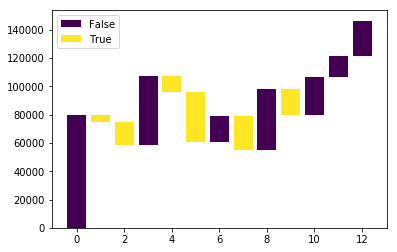

In [4]:
df = load_input_table("003.json")
df["index"] = df.index
tmp = df["Net Cash Flow"].cumsum()
df = df.join(tmp, lsuffix='', rsuffix=' Sum')
df = df.assign(c=df["Net Cash Flow Sum"]-df["Net Cash Flow"])
df = df.assign(d=df["c"]>df["Net Cash Flow Sum"])

#plt.bar(x=df["Month"], height=df["Net Cash Flow"], bottom=df["c"], color=values_to_colors(df["d"]))
chart = MatplotlibChart(df, MpBarChart(c_x="index", c_height="Net Cash Flow", c_bot="c", c_color="d"))

print(df)
#pprint(chart.eval())
chart.render()

    Shift  Period Start of Shift End of Shift  Duration    s1    s0
0       1       1      50 / 1150   110 / 1090        60   110    50
1       2       1      224 / 976    272 / 928        48   272   224
2       3       1      379 / 821    419 / 781        40   419   379
3       4       1      545 / 655    601 / 599        56   601   545
4       5       1      759 / 441    840 / 360        81   840   759
5       6       1      966 / 234   1014 / 186        48  1014   966
6       7       1     1084 / 116    1146 / 54        62  1146  1084
7       8       2       0 / 1200    60 / 1140        60    60     0
8       9       2     157 / 1043    245 / 955        88   245   157
9      10       2      558 / 642    604 / 596        46   604   558
10     11       2      701 / 499    767 / 433        66   767   701
11     12       2      830 / 370    913 / 287        83   913   830
12     13       2     1057 / 143    1140 / 60        83  1140  1057
13     14       3      39 / 1161    76 / 1124   

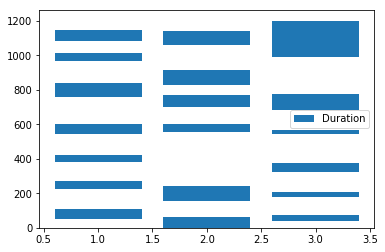

In [5]:
df = load_input_table("015.json")

split_col = df["End of Shift"].str.split("/", expand=True)
df["s1"] = split_col[0]
split_col = df["Start of Shift"].str.split("/", expand=True)
df["s0"] = split_col[0]

df = pd.DataFrame.from_records(load_and_clean_table(df))

#plt.bar(x=df["Period"], height=df["Duration"], bottom=df["s0"])
chart = MatplotlibChart(df, MpBarChart(c_x="Period", c_height="Duration", c_bot="s0"))

print(df)
#pprint(chart.eval())
chart.render()

Item variable  Desktop Computers  Laptops  Monitors  Printers
0        2012                 20       34        12        78
1        2013                 12       45        10        13
2        2014                 13       40        17        90
3        2015                 12       39        15        14


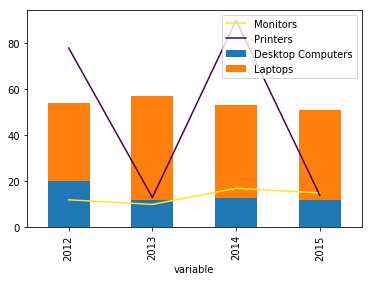

In [6]:
df = load_input_table("018.json")

df = pd.melt(df, id_vars='Item', value_vars=["2012", "2013", "2014", "2015"])
df = df.pivot_table(index="variable", columns="Item", values=['value'])
df.columns = df.columns.droplevel(0)
df = df.reset_index()

print(df)
# fig, ax = plt.subplots()
# for col in ["Monitors", "Printers"]:
#     ax.plot(df["variable"], df[col], label=col)
# df.plot.bar(x="variable", y=["Desktop Computers", "Laptops"], stacked=True, ax=ax)
# ax.legend()

chart = MatplotlibChart(df, MpMultiLayer(
            charts=[
                MpGroupBarChart(c_x="variable", c_ys=["Desktop Computers", "Laptops"], stacked=True),
                MpLineChart(c_x="variable", c_ys=["Monitors", "Printers"])
            ]))
chart.render()

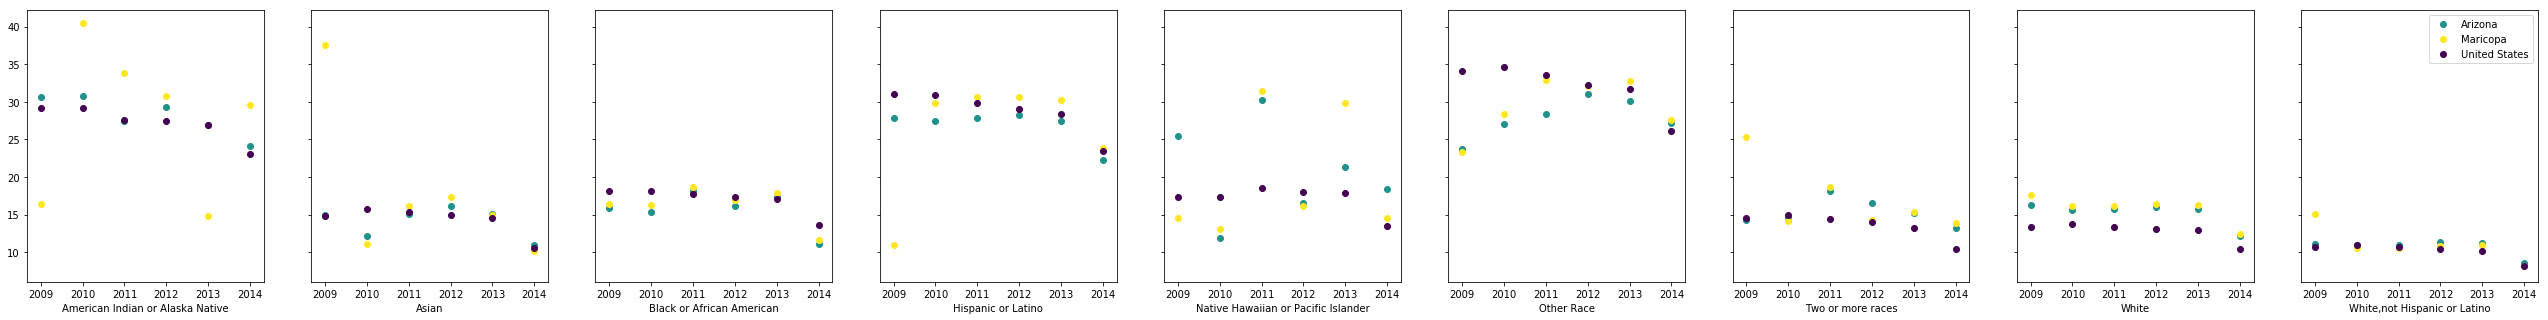

In [7]:
df = load_input_table("009.json")
df = pd.melt(df, id_vars=['Location', 'Rae'], value_vars=["2009", "2010", "2011", "2012", "2013", "2014"])
df = df.pivot_table(index=["variable", "Rae"], columns="Location", values=['value']).reset_index()
df.columns = [col[-1] if col[-1] != "" else col[0] for col in df.columns.values]

chart = MatplotlibChart(df, MpSubplot(
            chart=MpScatterPlot(c_x="variable", c_ys=["Arizona", "Maricopa", "United States"]),
            column="Rae"))
#print(df)
#pprint(chart.eval())
chart.render()

         variable        C2  Q1  Q2  Q3
0            APAC   Adopted  38  27  59
1            APAC   Engaged  47  37  75
2            APAC   Pitched  45  35  74
3            APAC  Targeted  48  39  87
4            EMEA   Adopted  52  42  62
5            EMEA   Engaged  65  54  78
6            EMEA   Pitched  59  50  72
7            EMEA  Targeted  66  56  91
8           LATAM   Adopted  31  26  53
9           LATAM   Engaged  48  41  80
10          LATAM   Pitched  44  37  73
11          LATAM  Targeted  48  43  95
12  North_America   Adopted  36  31  40
13  North_America   Engaged  52  43  55
14  North_America   Pitched  45  39  50
15  North_America  Targeted  56  50  70


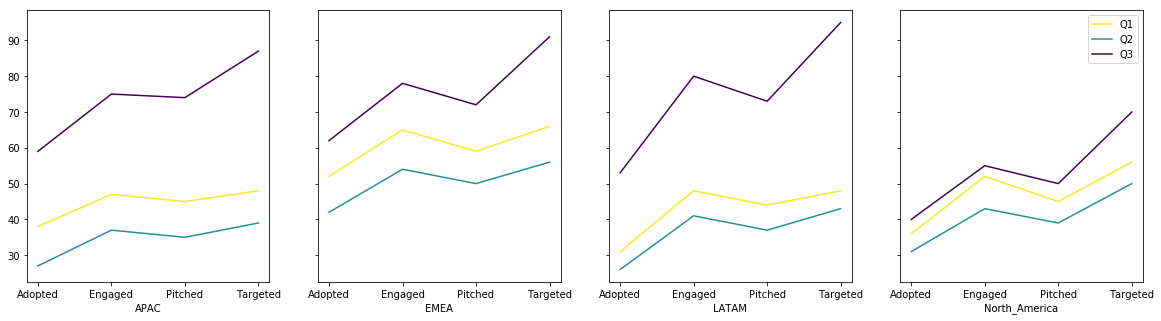

In [8]:
df = load_input_table("012.json")
df = pd.melt(df, id_vars=["C1", "C2"], value_vars=["EMEA", "LATAM", "North_America", "APAC"])
df = df.pivot_table(index=["variable", "C2"], columns="C1", values=['value']).reset_index()
df.columns = [col[-1] if col[-1] != "" else col[0] for col in df.columns.values]

print(df)

# group = df["variable"]
# num_group = len(np.unique(group))
# fig, axes = plt.subplots(1,num_group,figsize=(num_group * 5,5),sharex=True, sharey=True)
# for ax,g in zip(axes, np.unique(group)):
#     i = np.where(group == g)
#     sub_df = df.loc[i]
#     for col in ["Q1", "Q2", "Q3"]:
#         ax.plot(sub_df["C2"], sub_df[col], label=col)
#         ax.set_xlabel(g)
# plt.legend()
# plt.show()

chart = MatplotlibChart(df, MpSubplot(
            chart=MpLineChart(c_x="C2", c_ys=["Q1", "Q2", "Q3"]),
            column="variable"))
#pprint(chart.eval())
chart.render()

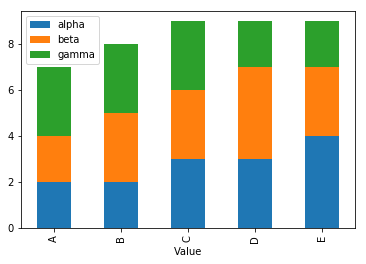

In [9]:
df = load_input_table("013.json")

chart = MatplotlibChart(df, MpGroupBarChart("Value", ["alpha", "beta", "gamma"], stacked=True))
#df.plot(kind="bar", x="Value", y=["alpha", "beta", "gamma"], stacked=True)

chart.render()

    Shift  Period Start of Shift End of Shift  Duration    s1    s0
0       1       1      50 / 1150   110 / 1090        60   110    50
1       2       1      224 / 976    272 / 928        48   272   224
2       3       1      379 / 821    419 / 781        40   419   379
3       4       1      545 / 655    601 / 599        56   601   545
4       5       1      759 / 441    840 / 360        81   840   759
5       6       1      966 / 234   1014 / 186        48  1014   966
6       7       1     1084 / 116    1146 / 54        62  1146  1084
7       8       2       0 / 1200    60 / 1140        60    60     0
8       9       2     157 / 1043    245 / 955        88   245   157
9      10       2      558 / 642    604 / 596        46   604   558
10     11       2      701 / 499    767 / 433        66   767   701
11     12       2      830 / 370    913 / 287        83   913   830
12     13       2     1057 / 143    1140 / 60        83  1140  1057
13     14       3      39 / 1161    76 / 1124   

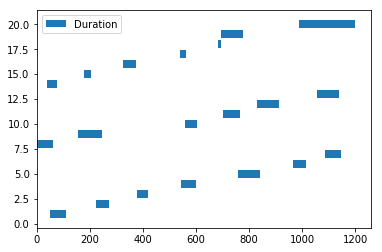

In [10]:
df = load_input_table("014.json")

split_col = df["End of Shift"].str.split("/", expand=True)
df["s1"] = split_col[0]
split_col = df["Start of Shift"].str.split("/", expand=True)
df["s0"] = split_col[0]

df = pd.DataFrame.from_records(load_and_clean_table(df))

#plt.barh(y=df["Shift"], width=df["Duration"], left=df["s0"])
chart = MatplotlibChart(df, MpBarChart(c_x="Shift", c_height="Duration", 
                                     c_bot="s0", orient="horizontal"))

print(df)
pprint(chart.eval())
chart.render()

  variable  lower range  means  stddev  upper range
0       Y1         0.39   0.52  0.1328         0.66
1       Y2         0.44   0.57  0.1321         0.70
2       Y3         0.47   0.60  0.1303         0.73
3       Y4         0.50   0.63  0.1266         0.75
4       Y5         0.51   0.63  0.1225         0.75


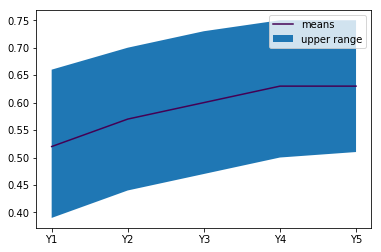

In [11]:
df = load_input_table("008.json")

# gather(dat, "col1", "col2", -Value) %>% spread(Value, col2)
df = pd.melt(df, id_vars='Value', value_vars=["Y1", "Y2", "Y3", "Y4", "Y5"])
df = df.pivot(index='variable',columns='Value', values='value').reset_index()
df = pd.DataFrame.from_records(load_and_clean_table(df))

print(df)
chart = MatplotlibChart(df, MpMultiLayer(
            charts=[
                MpAreaChart(c_x="variable", c_tops=["upper range"], c_bots=["lower range"]),
                MpLineChart(c_x="variable", c_ys=["means"])]))
chart.render()

    Year    loc  Bisc  Choc
0   2007  NORTH   6.0  14.0
1   2007  SOUTH   4.0  10.0
2   2007   WEST   4.0   6.0
3   2008  NORTH   6.7  18.0
4   2008  SOUTH   5.0  11.0
5   2008   WEST   5.0  10.0
6   2009  NORTH   7.0  19.0
7   2009  SOUTH   5.7  14.0
8   2009   WEST   5.7  12.0
9   2010  NORTH   8.0  21.0
10  2010  SOUTH   6.0  16.0
11  2010   WEST   6.0  15.0


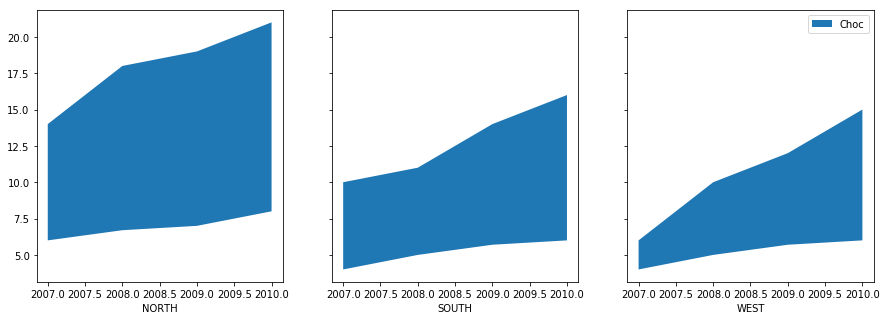

In [12]:
df = load_input_table("039.json")

df = pd.melt(df, id_vars=["Year"], 
               value_vars=["NORTH-Bisc", "NORTH-Choc", "SOUTH-Bisc", "SOUTH-Choc", "WEST-Bisc", "WEST-Choc"])
split_col = df["variable"].str.split("-", expand=True)
df["loc"] = split_col[0]
df["type"] = split_col[1]
df = df.pivot_table(index=["Year", "loc"], columns='type', values=['value']).reset_index()
df.columns = ["Year", "loc", "Bisc", "Choc"]

print(df)

chart = MatplotlibChart(df, MpSubplot(
            chart=MpAreaChart(c_x="Year", c_bots=["Bisc"], c_tops=["Choc"]),
            column="loc"))

# chart = MatplotlibChart(df, MultiLayer(
#             charts=[
#                 AreaChart(c_x="variable", c_top="upper range", c_bot="lower range"),
#                 LineChart(c_x="variable", c_ys=["means"])]))
chart.render()

,Date,variable,neg,pos
0,1-Apr-13,Volume,NaN,8100.0
1,1-Apr-13,VolumeDiff,4800.0,NaN
2,1-Aug-05,Volume,NaN,20500.0
3,1-Aug-05,VolumeDiff,NaN,2400.0
4,1-Aug-11,Volume,NaN,13000.0
...,...,...,...,...
1048,9-May-11,VolumeDiff,5100.0,NaN
1049,9-Nov-09,Volume,NaN,24400.0
1050,9-Nov-09,VolumeDiff,6800.0,NaN
1051,9-Oct-06,Volume,NaN,13200.0


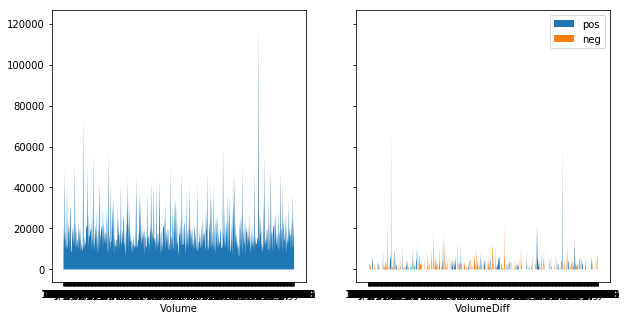

In [13]:
df = load_input_table("036.json")
df["VolumeDiff"] = df["Volume"].diff()
df = pd.melt(df, id_vars=["Close", "Date"], value_vars=["VolumeDiff", "Volume"])
df["color"] = np.array(list(map(lambda x: "pos" if x > 0 else "neg", df['value'])))
df["value"] = df["value"].abs()

df = df.pivot_table(index=["Date", "variable"], columns="color", values=['value']).reset_index()
df.columns = [col[-1] if col[-1] != "" else col[0] for col in df.columns.values]

display(df)

chart = MatplotlibChart(df, MpSubplot(
            chart=MpAreaChart(c_x="Date", c_tops=["pos", "neg"]),
            column="variable"))

#print(chart.eval())
chart.render()